In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import os

import matplotlib.pyplot as plt

In [6]:
bb_data = pd.read_csv('data/bb_data_cleaned.csv')

In [10]:
bb_data

,Player Name,HR,Year,Age,G,PA,AB,R,H,2B,...,SH,SF,GDP,SB,CS,BA,OBP,SLG,OPS,AllStar
0,Alejandro Sanchez,6.0,1985.0,26.0,71.0,133.0,133.0,19.0,33.0,6.0,...,0.0,0.0,4.0,2.0,2.0,0.248,0.248,0.459,0.707,0.0
1,Andres Thomas,6.0,1986.0,22.0,102.0,335.0,323.0,26.0,81.0,17.0,...,2.0,2.0,14.0,4.0,6.0,0.251,0.267,0.372,0.639,0.0
2,Barbaro Garbey,5.0,1984.0,27.0,110.0,348.0,327.0,45.0,94.0,17.0,...,0.0,2.0,8.0,6.0,7.0,0.287,0.325,0.391,0.716,0.0
3,Barry Lyons,4.0,1987.0,27.0,53.0,143.0,130.0,15.0,33.0,4.0,...,0.0,3.0,1.0,0.0,0.0,0.254,0.301,0.392,0.693,0.0
4,Bill Bathe,5.0,1986.0,25.0,39.0,112.0,103.0,9.0,19.0,3.0,...,6.0,0.0,2.0,0.0,0.0,0.184,0.208,0.359,0.567,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6931,Yoenis Cspedes (RoY-2nd),23.0,2012.0,26.0,129.0,540.0,487.0,70.0,142.0,25.0,...,0.0,3.0,9.0,16.0,4.0,0.292,0.356,0.505,0.861,1.0
6932,Yonder Alonso (RoY-6th),9.0,2012.0,25.0,155.0,619.0,549.0,47.0,150.0,39.0,...,1.0,4.0,14.0,3.0,0.0,0.273,0.348,0.393,0.741,1.0
6933,Yonder Alonso,5.0,2011.0,24.0,47.0,98.0,88.0,9.0,29.0,4.0,...,0.0,0.0,2.0,0.0,0.0,0.330,0.398,0.545,0.943,1.0
6934,Zack Cozart,2.0,2011.0,25.0,11.0,38.0,37.0,6.0,12.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.324,0.324,0.486,0.811,1.0


In [11]:
bb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6936 entries, 0 to 6935
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Player Name  6936 non-null   object 
 1   HR           6936 non-null   float64
 2   Year         6936 non-null   float64
 3   Age          6936 non-null   float64
 4   G            6936 non-null   float64
 5   PA           6936 non-null   float64
 6   AB           6936 non-null   float64
 7   R            6936 non-null   float64
 8   H            6936 non-null   float64
 9   2B           6936 non-null   float64
 10  3B           6936 non-null   float64
 11  RBI          6936 non-null   float64
 12  BB           6936 non-null   float64
 13  IBB          6936 non-null   float64
 14  SO           6936 non-null   float64
 15  HBP          6936 non-null   float64
 16  SH           6936 non-null   float64
 17  SF           6936 non-null   float64
 18  GDP          6936 non-null   float64
 19  SB    

In [12]:
bb_data.head()

,Player Name,HR,Year,Age,G,PA,AB,R,H,2B,...,SH,SF,GDP,SB,CS,BA,OBP,SLG,OPS,AllStar
0,Alejandro Sanchez,6.0,1985.0,26.0,71.0,133.0,133.0,19.0,33.0,6.0,...,0.0,0.0,4.0,2.0,2.0,0.248,0.248,0.459,0.707,0.0
1,Andres Thomas,6.0,1986.0,22.0,102.0,335.0,323.0,26.0,81.0,17.0,...,2.0,2.0,14.0,4.0,6.0,0.251,0.267,0.372,0.639,0.0
2,Barbaro Garbey,5.0,1984.0,27.0,110.0,348.0,327.0,45.0,94.0,17.0,...,0.0,2.0,8.0,6.0,7.0,0.287,0.325,0.391,0.716,0.0
3,Barry Lyons,4.0,1987.0,27.0,53.0,143.0,130.0,15.0,33.0,4.0,...,0.0,3.0,1.0,0.0,0.0,0.254,0.301,0.392,0.693,0.0
4,Bill Bathe,5.0,1986.0,25.0,39.0,112.0,103.0,9.0,19.0,3.0,...,6.0,0.0,2.0,0.0,0.0,0.184,0.208,0.359,0.567,0.0


In [13]:
AS_data = bb_data.groupby('AllStar')[['HR', 'R', 'H', '2B', '3B','RBI', 'BB','IBB','SO','GDP','SB','BA', 'OBP', 'SLG', 'OPS']].mean()

In [14]:
AS_data.reset_index(level=0, inplace = True)
AS_data.head()

,AllStar,HR,R,H,2B,3B,RBI,BB,IBB,SO,GDP,SB,BA,OBP,SLG,OPS
0,0.0,1.967465,11.331296,22.604955,4.162015,0.610900,9.731627,7.571429,0.435343,19.684228,1.922543,1.728819,0.216536,0.273647,0.317055,0.590691
1,1.0,5.906924,28.030647,55.015891,10.315551,1.601589,25.406356,17.908059,1.173666,40.874007,4.265607,4.892168,0.248775,0.306512,0.379951,0.686477


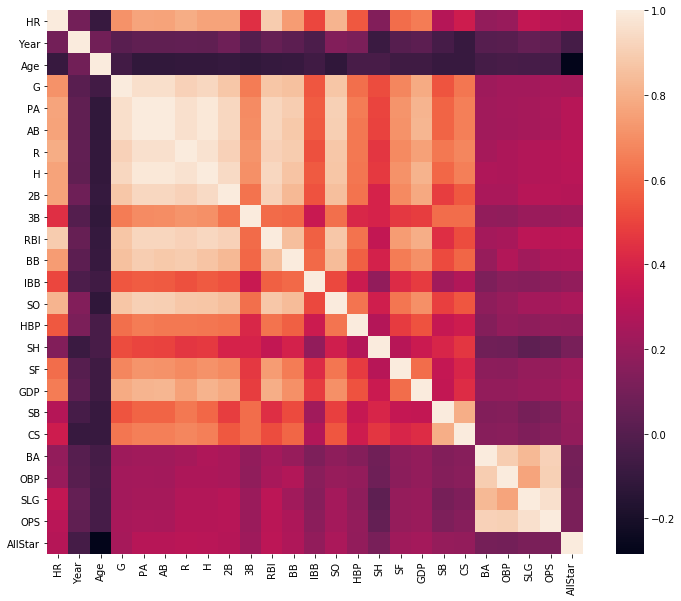

In [15]:
plt.subplots(figsize=(12,10))
sns.heatmap(bb_data.corr());

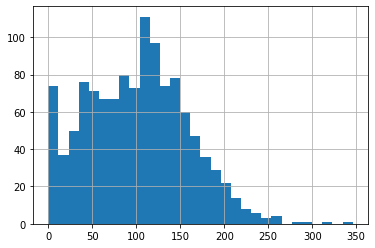

In [17]:
bb_data.HR.hist(bins=30)
plt.xlabel('')
plt.ylabel('');

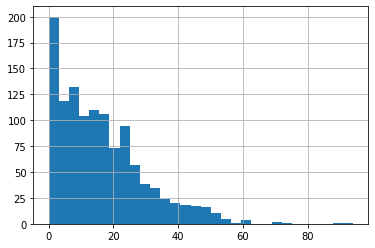

In [18]:
bb_data.H.hist(bins=30)
plt.xlabel('')
plt.ylabel('');

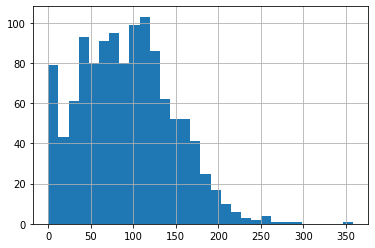

In [19]:
bb_data.2B.hist(bins=30)
plt.xlabel('')
plt.ylabel('');

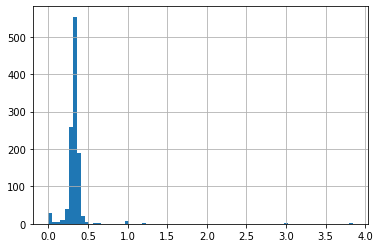

In [27]:
bb_data.3B.hist(bins=75)
plt.xlabel('')
plt.ylabel('');

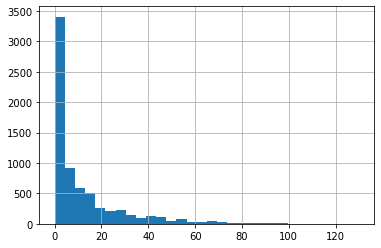

In [16]:
bb_data.RBI.hist(bins=30)
plt.xlabel('')
plt.ylabel('');

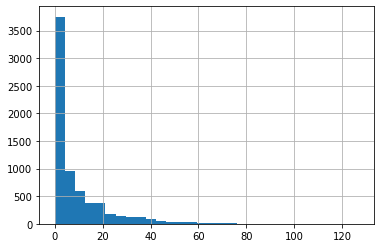

In [17]:
bb_data.BB.hist(bins=30)
plt.xlabel('')
plt.ylabel('');

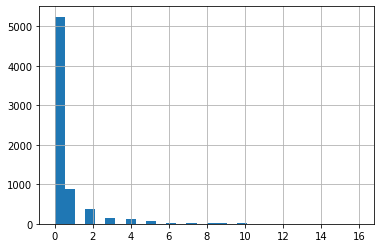

In [18]:
bb_data.IBB.hist(bins=30)
plt.xlabel('')
plt.ylabel('');

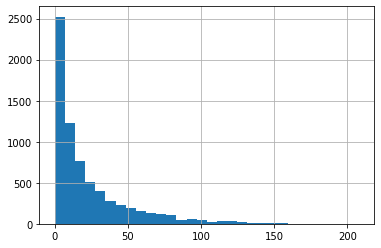

In [19]:
bb_data.SO.hist(bins=30)
plt.xlabel('')
plt.ylabel('');

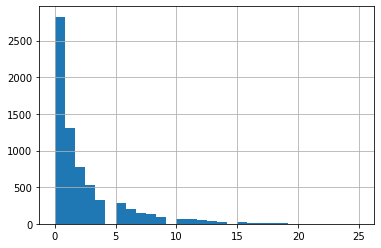

In [20]:
bb_data.GDP.hist(bins=30)
plt.xlabel('')
plt.ylabel('');

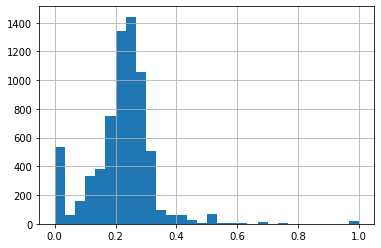

In [21]:
bb_data.BA.hist(bins=30)
plt.xlabel('')
plt.ylabel('');

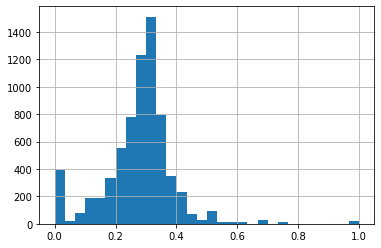

In [22]:
bb_data.OBP.hist(bins=30)
plt.xlabel('')
plt.ylabel('');

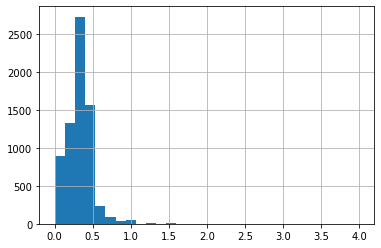

In [23]:
bb_data.SLG.hist(bins=30)
plt.xlabel('')
plt.ylabel('');

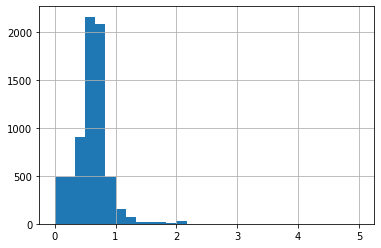

In [24]:
bb_data.OPS.hist(bins=30)
plt.xlabel('')
plt.ylabel('');